In [7]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from multiprocess import Pool

import numpy as np

In [29]:
sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from data_manager import *
from metadata import *


Setting environment for Gordon


In [23]:
img = cv2.imread('/home/yuncong/csd395/LeavesTexture/hedge_9103205_annotated.png')[250:1750]

In [25]:
annotation = np.all(img, axis=2)

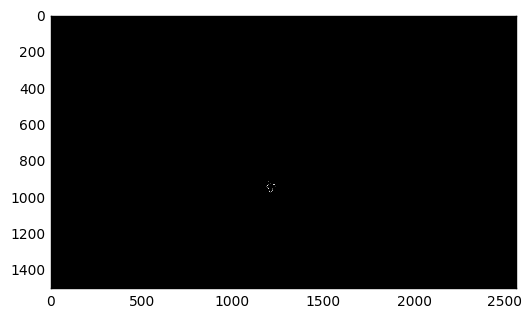

In [28]:
plt.imshow(annotation, plt.cm.gray);

In [31]:
from registration_utilities import *

In [35]:
example_contours = find_contour_points(annotation)[1]

In [37]:
example_contours[0]

array([[1205,  974],
       [1199,  970],
       [1197,  962],
       [1192,  957],
       [1195,  950],
       [1187,  948],
       [1183,  942],
       [1188,  936],
       [1193,  931],
       [1191,  926],
       [1190,  917],
       [1197,  915],
       [1203,  919],
       [1207,  925],
       [1206,  925],
       [1201,  920],
       [1195,  916],
       [1191,  921],
       [1193,  929],
       [1193,  932],
       [1188,  938],
       [1184,  944],
       [1190,  948],
       [1197,  945],
       [1198,  948],
       [1194,  954],
       [1196,  960],
       [1200,  966],
       [1203,  973],
       [1209,  970],
       [1214,  964],
       [1216,  957],
       [1219,  951],
       [1224,  956],
       [1233,  955],
       [1234,  947],
       [1230,  941],
       [1234,  937],
       [1229,  932],
       [1220,  931],
       [1222,  930],
       [1231,  931],
       [1235,  937],
       [1231,  941],
       [1236,  946],
       [1234,  954],
       [1229,  958],
       [1221,

In [49]:
img = cv2.imread('/home/yuncong/csd395/LeavesTexture/hedge_9103205.JPG')[250:1750][600:800, 600:800]

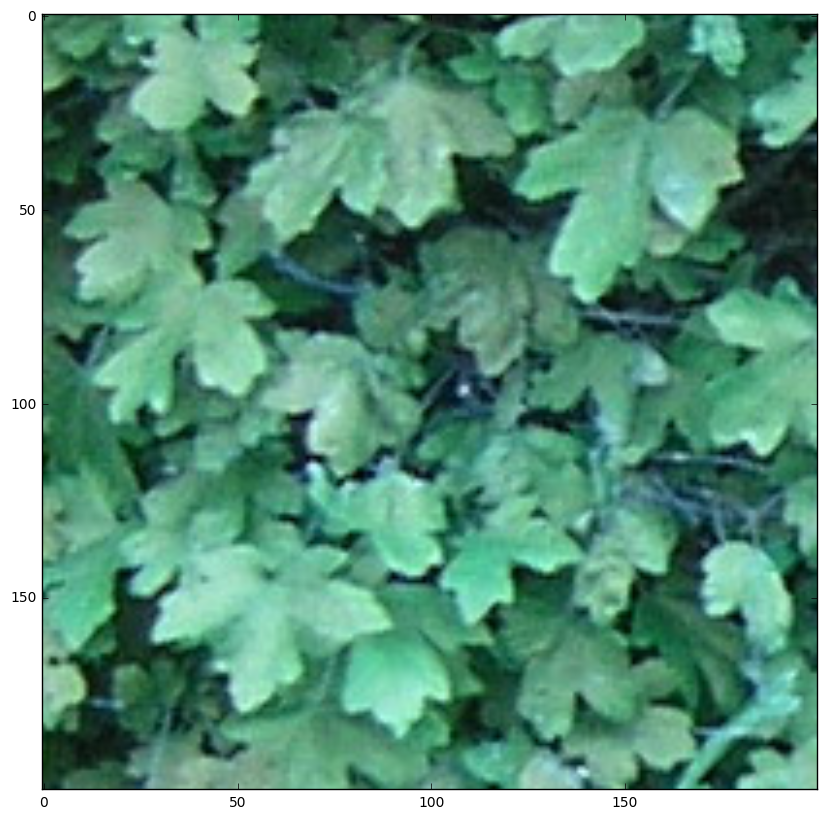

In [50]:
plt.figure(figsize=(10,10));
plt.imshow(img);
plt.show();

In [30]:
import numpy as np
from skimage.io import imsave
from skimage.util import img_as_ubyte

In [15]:
def display_image(vis, filename='tmp.jpg'):

    if vis.dtype != np.uint8:
        imsave(filename, img_as_ubyte(vis))
    else:
        imsave(filename, vis)

    from IPython.display import FileLink
    return FileLink(filename)

In [25]:
from skimage.feature import canny

In [26]:
from skimage.color import rgb2hsv, rgb2lab

In [55]:
img_lab = rgb2lab(img)

In [51]:
img_hsv = rgb2hsv(img)

In [33]:
display_image(img)

/oasis/projects/nsf/csd395/yuncong/Brain/cells/tmp.jpg

In [35]:
display_image(img_hsv[..., 1])

/oasis/projects/nsf/csd395/yuncong/Brain/cells/tmp.jpg

In [39]:
from skimage.filters import threshold_otsu

In [43]:
thresh = threshold_otsu(img_hsv[..., 1])

In [44]:
mask = img_hsv[..., 1] > thresh

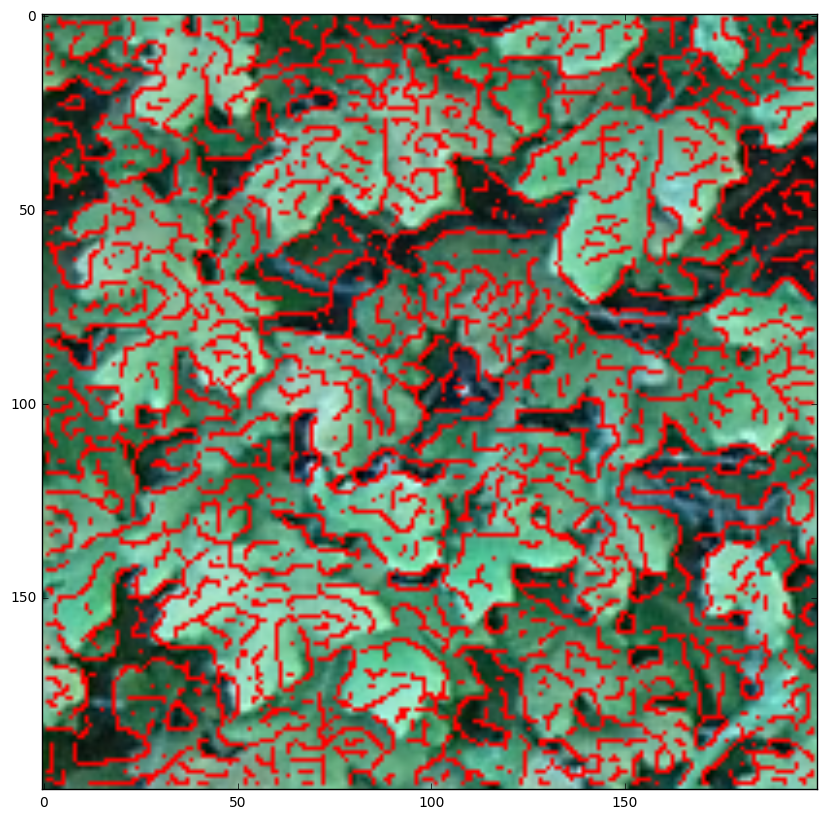

In [65]:
edge_img_a = canny(img_lab[..., 1])
plt.figure(figsize=(10,10));

viz = img.copy()
viz[edge_img_a] = (255,0,0)
plt.imshow(viz);

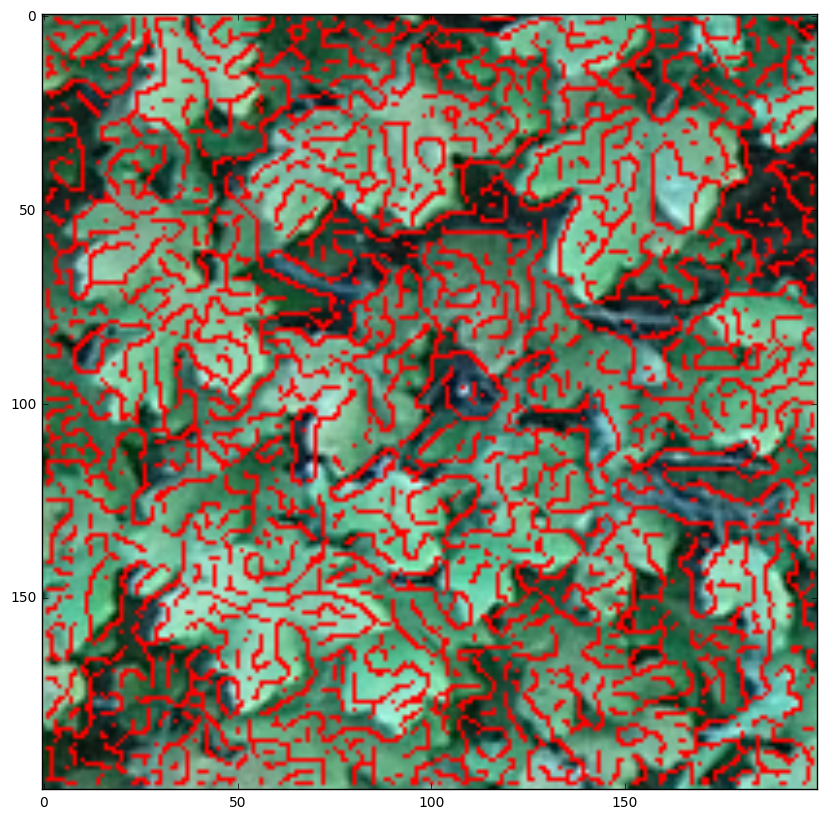

In [67]:
edge_img_b = canny(img_lab[..., 2])
plt.figure(figsize=(10,10));

viz = img.copy()
viz[edge_img_b] = (255,0,0)
plt.imshow(viz);

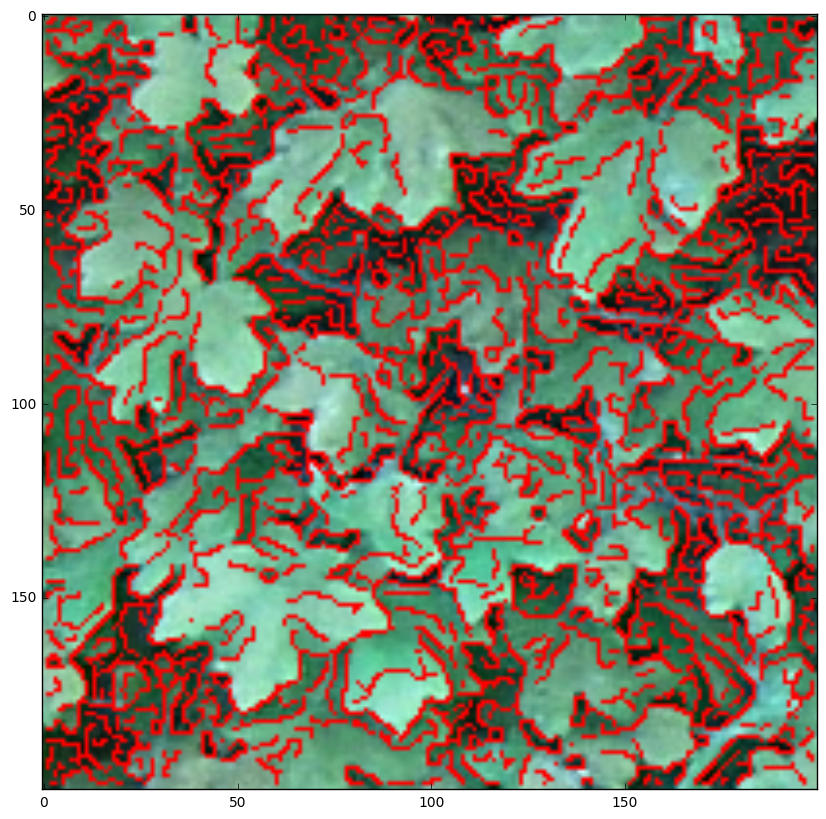

In [71]:
edge_img_sat = canny(img_hsv[..., 1])

plt.figure(figsize=(10,10));

viz = img.copy()
viz[edge_img_sat] = (255,0,0)
plt.imshow(viz);

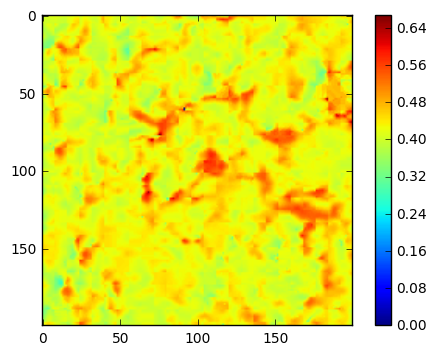

In [104]:
plt.imshow(img_hsv[..., 0]);
plt.colorbar();

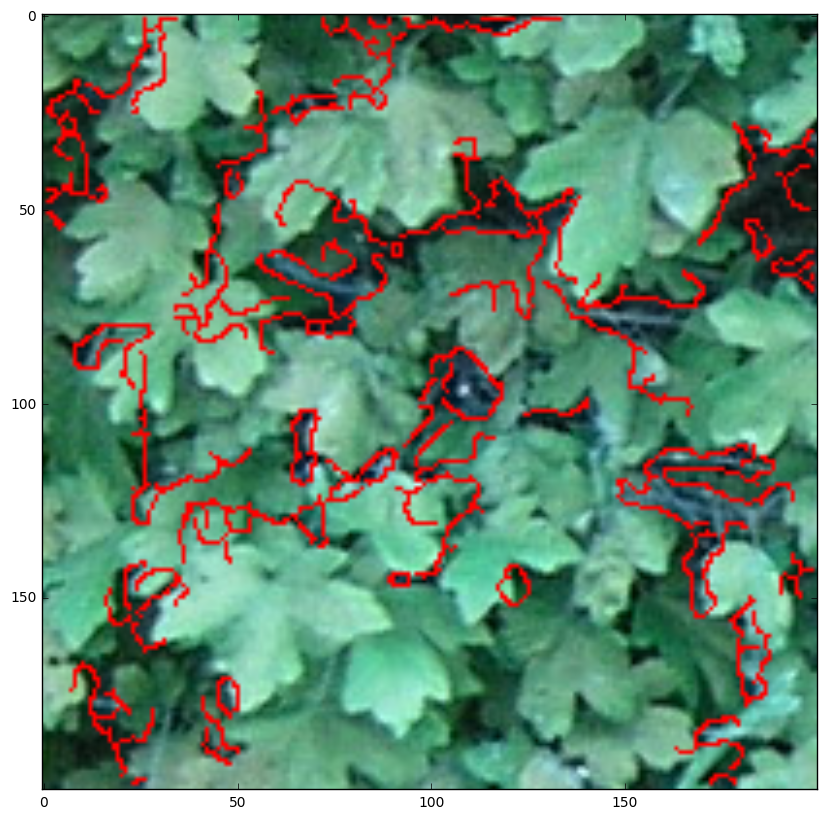

In [110]:
edge_img_hue = canny(img_hsv[..., 0], low_threshold=.01, high_threshold=.2)

plt.figure(figsize=(10,10));

viz = img.copy()
viz[edge_img_hue] = (255,0,0)
plt.imshow(viz);

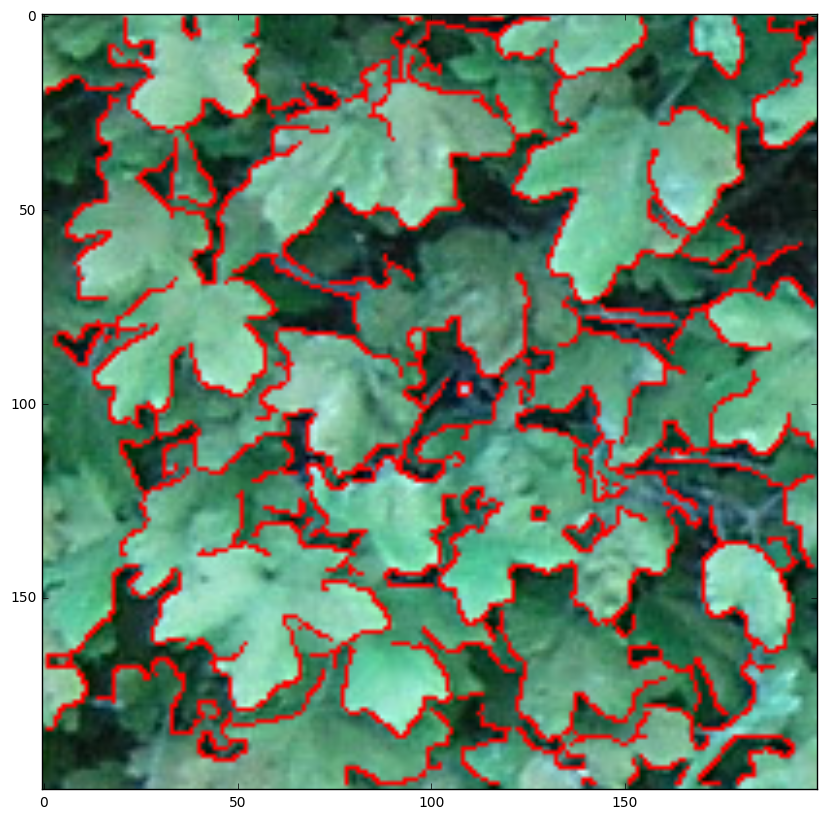

In [93]:
edge_img_val = canny(img_hsv[..., 2], low_threshold=.2, high_threshold=.9)

plt.figure(figsize=(10,10));

viz = img.copy()
viz[edge_img_val] = (255,0,0)
plt.imshow(viz);